<a href="https://colab.research.google.com/github/ibonetc/DataAnalytics_Text/blob/master/DA_Classify_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de texto

Se utilizará el corpus TASS (http://tass.sepln.org/tass_data/download.php) como ejemplo, de tweets en español que ya están etiquetados.

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('spanish')
import pandas as pd
from lxml import objectify

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Cargar los datos desde xml

In [ ]:
!head -n 30 /content/drive/My\ Drive/Analitics_Esp/Datos\ Corpus\ TASS/general-train-tagged.xml

<?xml version="1.0" encoding="UTF-8"?>
<tweets>
 <tweet>
  <tweetid>142389495503925248</tweetid>
  <user>ccifuentes</user>
  <content><![CDATA[Salgo de #VeoTV , que día más largoooooo...]]></content>
  <date>2011-12-02T00:47:55</date>
  <lang>es</lang>
  <sentiments>
   <polarity><value>NONE</value><type>AGREEMENT</type></polarity>
  </sentiments>
  <topics>
   <topic>otros</topic>
  </topics>
 </tweet>
 <tweet>
  <tweetid>142389933619945473</tweetid>
  <user>CarmendelRiego</user>
  <content><![CDATA[@PauladeLasHeras No te libraras de ayudar me/nos. Besos y gracias]]></content>
  <date>2011-12-02T00:49:40</date>
  <lang>es</lang>
  <sentiments>
   <polarity><value>NEU</value><type>DISAGREEMENT</type></polarity>
   <polarity><entity>@PauladeLasHeras</entity><value>NEU</value><type>DISAGREEMENT</type></polarity>
  </sentiments>
  <topics>
   <topic>otros</topic>
  </topics>
 </tweet>
 <tweet>


In [ ]:
path='/content/drive/My Drive/Analitics_Esp/Datos Corpus TASS/'
filetrain=path+'general-train-tagged.xml'
filetest=path+'general-test-tagged.xml'

In [ ]:
xml = objectify.parse(open(filetrain))
root = xml.getroot()

In [ ]:
root.tag

'tweets'

In [ ]:
tweets = root.getchildren()
len(tweets)

7219

In [ ]:
# Los hijos son lo que está contenido dentro de cada tag tweet, por ejemplo el primero:
print(tweets[0].content.text)
print(tweets[0].sentiments.polarity.value.text)
print(tweets[0].sentiments.polarity.type.text)
print(tweets[0].lang.text)
print(tweets[0].date.text)


Salgo de #VeoTV , que día más largoooooo...
NONE
AGREEMENT
es
2011-12-02T00:47:55


Vamos a crear un Dataframe con los datos de los xml, con tres columnas, el contenido de los tweets, el idioma, la polaridad y la columna de agreement que le han agregado

In [ ]:
def xmlToDataframe(fileXML,type='train'):
  xml = objectify.parse(open(fileXML))
  root = xml.getroot()
  corpus = pd.DataFrame(columns=['content','lang', 'polarity', 'agreement'])
  tweets = root.getchildren()
  #for i in range(0,len(tweets)):
  for i,t in enumerate(tweets):
    corpus.loc[i]=[t.content.text, t.lang.text, t.sentiments.polarity.value.text, t.sentiments.polarity.type.text] if type=='train' else \
     [t.content.text, t.lang.text, t.sentiments.polarity.value.text,'']
  return corpus

In [ ]:
train=xmlToDataframe(filetrain)

In [ ]:
test=xmlToDataframe(filetest,type='test')

In [ ]:
corpusTweets=pd.concat([train, test])

In [ ]:
len(corpusTweets)

68017

In [ ]:
corpusTweets.to_csv(path+'general-tagged.csv', encoding='utf8')

In [ ]:
corpusTweets

,content,lang,polarity,agreement
0,"Salgo de #VeoTV , que día más largoooooo...",es,NONE,AGREEMENT
1,@PauladeLasHeras No te libraras de ayudar me/n...,es,NEU,DISAGREEMENT
2,@marodriguezb Gracias MAR,es,P,AGREEMENT
3,"Off pensando en el regalito Sinde, la que se v...",es,N+,AGREEMENT
4,Conozco a alguien q es adicto al drama! Ja ja ...,es,P+,AGREEMENT
...,...,...,...,...
60793,@Juandecolmenero @angelrubioti @barbara_ruizp ...,es,P+,
60794,Escuchan lo que quieren RT @almudenanegro: El ...,es,NONE,
60795,¿A qué espera el alcalde promarihuana independ...,es,N,
60796,Esto es lo que hay... Preocupante la flagrante...,es,N,


## Cargar los datos desde csv

In [78]:
path='/content/drive/My Drive/Analitics_Esp/Datos Corpus TASS/'
corpusDF=pd.read_csv(path+'general-tagged.csv', encoding='utf8')

In [79]:
pd.set_option('max_colwidth',1000)
corpusDF

,Unnamed: 0,content,lang,polarity,agreement
0,0,"Salgo de #VeoTV , que día más largoooooo...",es,NONE,AGREEMENT
1,1,@PauladeLasHeras No te libraras de ayudar me/nos. Besos y gracias,es,NEU,DISAGREEMENT
2,2,@marodriguezb Gracias MAR,es,P,AGREEMENT
3,3,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",es,N+,AGREEMENT
4,4,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,es,P+,AGREEMENT
...,...,...,...,...,...
68012,60793,@Juandecolmenero @angelrubioti @barbara_ruizp @sigfridgras Son los mismos de seguridad con Aznar y ZP. Profesionales. Avanzan si avanza!,es,P+,NaN
68013,60794,Escuchan lo que quieren RT @almudenanegro: El FMI sugiere que España apruebe 1 programa de quitas en la deuda familiar http://t.co/qcmv62XF,es,NONE,NaN
68014,60795,¿A qué espera el alcalde promarihuana independentista de Rasquera para dimitir? Prometió que lo haría si fracasaba. http://t.co/4BcM4fQj,es,N,NaN
68015,60796,Esto es lo que hay... Preocupante la flagrante falta de liderazgo de Rajoy... Y no me vale que ZP fuera un desastre... http://t.co/c2uY3ukb,es,N,NaN


Después de procesar y unir todos los archivos, tenemos un archivo con unos 68017 tweets con una polaridad asociada. Dicha polaridad esta codificada como una variable ordinal que contiene uno de los siguientes valores: N+ (muy negativo), N (negativo), NEU (Neutral), P (Positivo), P+ (muy positivo).

activar la vista de tablas dinámicas

In [5]:
%load_ext google.colab.data_table

In [80]:
corpusDF.head(10)

,Unnamed: 0,content,lang,polarity,agreement
0,0,"Salgo de #VeoTV , que día más largoooooo...",es,NONE,AGREEMENT
1,1,@PauladeLasHeras No te libraras de ayudar me/nos. Besos y gracias,es,NEU,DISAGREEMENT
2,2,@marodriguezb Gracias MAR,es,P,AGREEMENT
3,3,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",es,N+,AGREEMENT
4,4,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,es,P+,AGREEMENT
5,5,"RT @FabHddzC: Si amas a alguien, déjalo libre. Si grita ese hombre es mío era @paurubio...",es,NONE,AGREEMENT
6,6,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,es,P+,AGREEMENT
7,7,Hoy asisitiré en Madrid a un seminario sobre la Estrategia Española de Seguridad organizado por FAES.,es,NONE,AGREEMENT
8,8,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,es,P+,AGREEMENT
9,9,Desde el escaño. Todo listo para empezar #endiascomohoy en el Congreso http://t.co/Mu2yIgCb,es,P+,AGREEMENT


In [81]:
corpusfilter = corpusDF.query('agreement != "DISAGREEMENT" and polarity != "NONE"')

In [82]:
corpusfilter.head()

,Unnamed: 0,content,lang,polarity,agreement
2,2,@marodriguezb Gracias MAR,es,P,AGREEMENT
3,3,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",es,N+,AGREEMENT
4,4,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,es,P+,AGREEMENT
6,6,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,es,P+,AGREEMENT
8,8,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,es,P+,AGREEMENT


In [83]:
corpusfilter.pop('agreement')

2        AGREEMENT
3        AGREEMENT
4        AGREEMENT
6        AGREEMENT
8        AGREEMENT
           ...    
68011          NaN
68012          NaN
68014          NaN
68015          NaN
68016          NaN
Name: agreement, Length: 44395, dtype: object

In [74]:
corpusfilter.shape

(44395, 4)

In [75]:
corpusfilter.polarity.value_counts()

P+     22382
N      12448
N+      5382
P       2565
NEU     1618
Name: polarity, dtype: int64

Para a seguir con el texto:
* Quitar URL, emails, menciones,hashtags
* Tokenización
* Radicalización (Stemming)
* Quitar stopwords 

In [84]:
import re
from string import punctuation
def  clean_text(df, text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Primero convertimos a minúscula
  df[text_field] = df[text_field].str.lower()
  # Utilizamos las expresiones regulares anteriores sobre URL, email, hashtag y menciones para quitarlos
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))  
  # Utilizamos una expresión regular para eliminar los hashtag y las menciones con @
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los signos de mayor que y menor que
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(\&gt\;)|(\&lt\;)','', elem))
  # Utilizamos una expresión regular también para eliminar a.m y p.m cuando mencionan horas
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(a\.m)|(p\.m)','', elem))
  # Utilizamos una expresión regular también para eliminar los números
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Sustituir espacios de más
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  non_words = list(punctuation)
  non_words.extend(['¿', '¡', '‘', '’'])
  df[text_field] = df[text_field].apply(lambda elem: ''.join([c for c in elem if c not in non_words]))
  return df

In [85]:
corpusclean = clean_text(corpusfilter.copy(), 'content')
corpusclean

,Unnamed: 0,content,lang,polarity
2,2,gracias mar,es,P
3,3,off pensando en el regalito sinde la que se va de la sgae cuando se van sus corruptos intento no sacar conclusiones lo intento,es,N+
4,4,conozco a alguien q es adicto al drama ja ja ja te suena d algo,es,P+
6,6,toca grabación dl especial navideñomari crismas,es,P+
8,8,buen día todos lo primero mandar un abrazo grande a miguel y a su familia hoy podría ser un día para la grandeza humana,es,P+
...,...,...,...,...
68011,60792,reconozco que me encanta cuando twitter corre,es,P+
68012,60793,son los mismos de seguridad con aznar y zp profesionales avanzan si avanza,es,P+
68014,60795,a qué espera el alcalde promarihuana independentista de rasquera para dimitir prometió que lo haría si fracasaba,es,N
68015,60796,esto es lo que hay preocupante la flagrante falta de liderazgo de rajoy y no me vale que zp fuera un desastre,es,N


In [14]:
!pip install emoji

     |████████████████████████████████| 51kB 1.5MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=999f070e91d776ee7710768990287b30f6705cfa5762037a9793bde9ce023790
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [15]:
import emoji
corpusclean['content']=corpusclean['content'].apply(lambda text: emoji.get_emoji_regexp().sub(r'', text))

## Matriz de términos de documento (CountVectorizer)
Para convertir el texto en número podemos utilizar la técnica de Bag-Of-Words (BOW) que consiste en calcular la frecuecian de cada palabra en texto. Utilizando CountVectorizer nos ayuda a este cálculo.

Por ejemplo en la frase:

Este curso es una maravilla y el grupo de estudiantes también es maravilloso.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [18]:
estudiantes=["Este curso es una maravilla y el grupo de estudiantes también es maravilloso", "Los estudiantes son muy aplicados", \
             "Un estudiante de analítica puede hacer maravillas"]
cv = CountVectorizer()
example = cv.fit_transform(estudiantes)
print(example.toarray())
print(cv.get_feature_names())

[[0 0 1 1 1 2 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1]
 [0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0]
 [1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0]]
['analítica', 'aplicados', 'curso', 'de', 'el', 'es', 'este', 'estudiante', 'estudiantes', 'grupo', 'hacer', 'los', 'maravilla', 'maravillas', 'maravilloso', 'muy', 'puede', 'son', 'también', 'un', 'una']


In [ ]:
df_example = pd.DataFrame(example.toarray(),columns=cv.get_feature_names())
df_example

,analítica,aplicados,curso,de,el,es,este,estudiante,estudiantes,grupo,hacer,los,maravilla,maravillas,maravilloso,muy,puede,son,también,un,una
0,0,0,1,1,1,2,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1
1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
2,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
cv = CountVectorizer(stop_words=stop)
example = cv.fit_transform(estudiantes)
df_example = pd.DataFrame(example.toarray(),columns=cv.get_feature_names())
df_example

,analítica,aplicados,curso,estudiante,estudiantes,grupo,hacer,maravilla,maravillas,maravilloso,puede
0,0,0,1,0,1,1,0,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,1,0,1


In [23]:
stemmer = SnowballStemmer('spanish')

def tokenize(text):
  # tokenize
  tokens =  word_tokenize(text)
  # stemming
  try:
    stems = [stemmer.stem(item) for item in tokens]
  except Exception as e:
    stems = ['']
  return stems

In [ ]:
cv = CountVectorizer(stop_words=stop,
                     analyzer = 'word',
                     tokenizer = word_tokenize,
                     lowercase = True,
                     ngram_range=(1, 2))
example = cv.fit_transform(estudiantes)
df_example = pd.DataFrame(example.toarray(),columns=cv.get_feature_names())
df_example

,analítica,analítica puede,aplicados,curso,curso maravilla,estudiante,estudiante analítica,estudiantes,estudiantes aplicados,estudiantes maravilloso,grupo,grupo estudiantes,hacer,hacer maravillas,maravilla,maravilla grupo,maravillas,maravilloso,puede,puede hacer
0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,0,0
1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,1


In [ ]:
cv = CountVectorizer(stop_words=stop,
                     analyzer = 'word',
                     tokenizer = tokenize,
                     lowercase = True,
                     ngram_range=(1, 2))
example = cv.fit_transform(estudiantes)
df_example = pd.DataFrame(example.toarray(),columns=cv.get_feature_names())
df_example

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien', 'tod', 'tuv', 'tuy', 'vosotr', 'vuestr'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,analit,analit pued,aplic,curs,curs maravill,estudi,estudi analit,estudi aplic,estudi tambien,grup,grup estudi,hac,hac maravill,maravill,maravill grup,pued,pued hac,tambien,tambien maravill
0,0,0,0,1,1,1,0,0,1,1,1,0,0,2,1,0,0,1,1
1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,1,0,0,0,0,1,1,1,0,1,1,0,0


## TF-IDF(Term-Frequency-Inverse-Document Frequency)
Una pregunta típica es de qué trata ese documentos o texto?<br/>
Una medida de cuán importante es una palabra en un documento puede ser la frecuencia de ella, como la hemos medido hasta ahora. A esto se le conoce como *term frequency (tf)*. <br/>

$$ TF(término)=\frac{frecuencia(término)}{Cantidad\;total\; de\; términos}$$
Es posible que una palabra sea más importante en un documentos que en otro, cuando estamos analizando varios documentos. <br/>
La técnica de stop-words es buena para eliminar las palabras comunmente usadas  en un lenguaje. 
Cuando necesitamos llevar las palabras a una medida numérica, además de la TF, otra técnica, cuando trabajamos con diferentes documentos, es la conocida como frecuencia inversa de documentos (idf), que disminuye el peso para palabras comunes y le da mayor peso a las que no son comunmente usadas en una colección de documentos (colección de novelas, o colección de sitios web).<br/>

$$IDF(término)=ln \left(\frac{n(documentos)}{n(domentos\;con\;término)}\right)$$


Pero el término que nos va a dar la importancia de los términos en un documento que hace parte de una colección es el tf_idf.<br/>

TF-IDF (siglas de Término-Frecuencia-Frecuencia de Documento Inverso) pondera las palabras comunes que ocurren en casi todos los documentos y le da más importancia a las palabras que aparecen en un subconjunto de documentos. TF-IDF funciona penalizando estas palabras comunes asignándoles pesos más bajos y dando importancia a algunas palabras raras en un documento en particular.

$$TF-IDF(término)=TF(término)*IDF(término)$$

In [19]:
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
example_tv = tv.fit_transform(estudiantes)
df_example = pd.DataFrame(example_tv.toarray(),columns=tv.get_feature_names())
df_example

,analítica,analítica puede,aplicados,curso,curso es,de,de analítica,de estudiantes,el,el grupo,es,es maravilloso,es una,este,este curso,estudiante,estudiante de,estudiantes,estudiantes son,estudiantes también,grupo,grupo de,hacer,hacer maravillas,los,los estudiantes,maravilla,maravilla el,maravillas,maravilloso,muy,muy aplicados,puede,puede hacer,son,son muy,también,también es,un,un estudiante,una,una maravilla
0,0.00000,0.00000,0.000000,0.208408,0.208408,0.158499,0.00000,0.208408,0.208408,0.208408,0.352865,0.208408,0.208408,0.208408,0.208408,0.00000,0.00000,0.158499,0.000000,0.208408,0.208408,0.208408,0.00000,0.00000,0.000000,0.000000,0.208408,0.208408,0.00000,0.208408,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.208408,0.208408,0.00000,0.00000,0.208408,0.208408
1,0.00000,0.00000,0.341426,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.259663,0.341426,0.000000,0.000000,0.000000,0.00000,0.00000,0.341426,0.341426,0.000000,0.000000,0.00000,0.000000,0.341426,0.341426,0.00000,0.00000,0.341426,0.341426,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
2,0.28196,0.28196,0.000000,0.000000,0.000000,0.214438,0.28196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.28196,0.28196,0.000000,0.000000,0.000000,0.000000,0.000000,0.28196,0.28196,0.000000,0.000000,0.000000,0.000000,0.28196,0.000000,0.000000,0.000000,0.28196,0.28196,0.000000,0.000000,0.000000,0.000000,0.28196,0.28196,0.000000,0.000000


## Entrenar un modelo de clasificación

In [100]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

Convertir la clase en numérico, en este caso la columna **polarity**

In [101]:
le = preprocessing.LabelEncoder()
le.fit(corpusclean['polarity'])
corpusclean['class']=le.transform(corpusclean['polarity'])

In [102]:
le.classes_

array(['N', 'N+', 'NEU', 'P', 'P+'], dtype=object)

In [103]:
le.transform(le.classes_)

array([0, 1, 2, 3, 4])

In [104]:
corpusclean[['content','class']]

,content,class
2,gracias mar,3
3,off pensando regalito sinde va sgae van corruptos intento sacar conclusiones intento,1
4,conozco alguien adicto drama ja ja ja suena,4
6,toca grabación especial navideñomari crismas,4
8,buen día primero mandar abrazo grande miguel familia hoy podría ser día grandeza humana,4
...,...,...
68011,reconozco encanta twitter corre,4
68012,mismos seguridad aznar zp profesionales avanzan si avanza,4
68014,espera alcalde promarihuana independentista rasquera dimitir prometió haría si fracasaba,0
68015,preocupante flagrante falta liderazgo rajoy vale zp desastre,0


Utilizar CountVectorizer para probar algunos clasificadores.

Otros parámetros a tener en cuenta en CountVectorizer:

*   max_df [0.0, 1.0]: Al construir el vocabulario, ignore los términos que tienen una frecuencia de documento estrictamente más alta que el umbral dado. Si es float, el parámetro representa una proporción de documentos, recuentos absolutos enteros.
*  min_df [0.0, 1.0]: Al construir el vocabulario, ignore los términos que tienen una frecuencia de documento estrictamente más baja que el umbral dado. Si es float, el parámetro representa una proporción de documentos, recuentos absolutos enteros.
*  max_features: construye un vocabulario que sólo considera las principales características máximas ordenadas por frecuencia de términos en todo el corpus.
*  stop_words: Términos que se ignoraron porque:
>  ocurrió en demasiados documentos (max_df)

 >  ocurrió en muy pocos documentos (min_df)

 >  fueron cortados por la selección de características (max_features).



Quitar stopwords primero

In [89]:
stop.extend(['dl','q','d'])
corpusclean['content'] = corpusclean['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [105]:
corpusclean.head()

,Unnamed: 0,content,lang,polarity,class
2,2,gracias mar,es,P,3
3,3,off pensando regalito sinde va sgae van corruptos intento sacar conclusiones intento,es,N+,1
4,4,conozco alguien adicto drama ja ja ja suena,es,P+,4
6,6,toca grabación especial navideñomari crismas,es,P+,4
8,8,buen día primero mandar abrazo grande miguel familia hoy podría ser día grandeza humana,es,P+,4


In [ ]:
corpusclean[['content','class']].to_csv(path+'corpus_class.csv', encoding='utf-8-sig')

In [6]:
path='/content/drive/My Drive/Analitics_Esp/Datos Corpus TASS/'
corpusclean=pd.read_csv(path+'corpus_class.csv', encoding='utf-8-sig')

In [95]:
cv = CountVectorizer(analyzer = 'word',
                     tokenizer = tokenize,
                     lowercase = True,
                     max_features=5000)
X = cv.fit_transform(corpusclean.content).toarray()

In [120]:
Y=list(corpusclean['class'])

In [93]:
print(X.shape,len(Y))

(44395, 5000) 44395


In [ ]:
len(cv.get_feature_names())

5000

Probar un SVM

In [ ]:
clf=LinearSVC(C=.2)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=9,stratify=Y)

In [17]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [18]:
y_pred=clf.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 859   99   27   31  229]
 [ 158  304   12    6   58]
 [  48   22   18    8   66]
 [  27    4    2   74  150]
 [ 165   44   23   34 1972]]


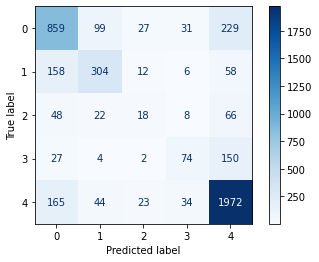

In [20]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(clf, X_test, y_test,
                      cmap=plt.cm.Blues,
                      values_format='d')
plt.show()

### Ajustar hiperparámetros de un clasificador y validación cruzada
Tratar de buscar los mejores parámetros para un clasificador y utilizar validación cruzada para ver el porciento de generalización

In [109]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score,f1_score,accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing

In [110]:
np.unique(corpusclean['class'])

array([0, 1, 2, 3, 4])

In [111]:
cv = CountVectorizer(analyzer = 'word',
                     tokenizer = tokenize,
                     lowercase = True,
                     max_features=1000,
                     min_df = 50,
                     max_df = 1.9
                     )
clf_SVM = OneVsRestClassifier(LinearSVC())
pipeline = Pipeline([
    ('vect', cv),
    ('cls', clf_SVM)
])

In [112]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'cls', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'cls__estimator__C', 'cls__estimator__class_weight', 'cls__estimator__dual', 'cls__estimator__fit_intercept', 'cls__estimator__intercept_scaling', 'cls__estimator__loss', 'cls__estimator__max_iter', 'cls__estimator__multi_class', 'cls__estimator__penalty', 'cls__estimator__random_state', 'cls__estimator__tol', 'cls__estimator__verbose', 'cls__estimator', 'cls__n_jobs'])

In [113]:
# Aqui definimos el espacio de parámetros a explorar tanto en el CountVectorizer, como en el clasificador
parameters = {
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigramas o bigramas
    'cls__estimator__C': (0.2, 0.5, 0.7, 1)
}
#GridSearchCV sólo trabaja con classes binarias
y = preprocessing.label_binarize(corpusclean['class'], classes=np.unique(corpusclean['class']))
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1 , scoring='recall_micro')
grid_search.fit(corpusclean.content, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.9,
                                                        max_features=1000,
                                                        min_df=50,
                                                        ngram_range=(1, 1),
                                                        

In [114]:
grid_search.best_params_

{'cls__estimator__C': 1, 'vect__ngram_range': (1, 1)}

In [115]:
grid_search.best_score_

0.6420092352742426

**Después de este resultado, con los mejores parámetros se entrana el clasificador. Obviamente acá es sólo un ejemplo, se deben usar más parámetros para decidir los hiperparámetros y se debe hacer quizás validación cruzada con k=10 y probar otros clasificadores**

## Entrenando el clasificador con los mejores parámetros

In [117]:
pipeline = Pipeline([
    ('vect', CountVectorizer(
            analyzer = 'word',
            tokenizer = tokenize,
            lowercase = True,
            min_df = 50,
            max_df = 1.9,
            ngram_range=(1, 1)
            )),
    ('cls', LinearSVC(C=.7))
])

In [122]:
pipeline.fit(corpusclean.content, Y)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.9,
                                 max_features=None, min_df=50,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at 0x7fe0fc3b66a8>,
                                 vocabulary=None)),
                ('cls',
                 LinearSVC(C=0.7, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', pe

Entonces ya con ese clasificador se puede cargar otros tweets y predecirlos:
tweets['polarity'] = pipeline.predict(tweets.tweet).
Vamos a hacer un ejemplo con unos de esta misma base.

In [123]:
y_pred=pipeline.predict(corpusclean.content)

In [124]:
accuracy_score(Y, y_pred)

0.7637346548034688

In [126]:
corpusclean['prediction']=y_pred
corpusclean[['content','class','prediction']].head(10)

,content,class,prediction
2,gracias mar,3,4
3,off pensando regalito sinde va sgae van corruptos intento sacar conclusiones intento,1,0
4,conozco alguien adicto drama ja ja ja suena,4,4
6,toca grabación especial navideñomari crismas,4,4
8,buen día primero mandar abrazo grande miguel familia hoy podría ser día grandeza humana,4,4
9,escaño listo empezar congreso,4,4
10,bdías em ira puente si vais dejeis llevar tableta pc luego orbyt momento digo,4,4
11,sistema económico recorta dinero prestaciones sociales refuerza billón medio euros bancos necesita repensarse,4,0
12,caca ajuste,1,4
13,buen viernes,3,4


### Utilizando TF-IDF

Debería hacerse una búsqueda de los hiperparámetros también y después entrenar, abajo se muestra un ejemplo de ya entrenar el clasificador después de buscar los hiperparámetros.

In [129]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer = 'word',
            tokenizer = tokenize,
            lowercase = True,
            min_df = 50,
            max_df = 1.9,
            ngram_range=(1, 1),
            sublinear_tf=True
            )),
    ('cls', LinearSVC(C=.7))
])

In [130]:
pipeline.fit(corpusclean.content, Y)
y_pred=pipeline.predict(corpusclean.content)
accuracy_score(Y, y_pred)

0.7620227503097196

## Recomendaciones: 
Se puede llevar la clase a sólo dos clases, positivos y negativos.
También se puede utilizar Lemmatización en vez de Radicalización, o sólo dejarlo con la Tokenización.